In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

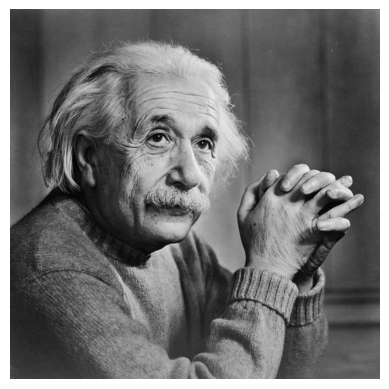

In [6]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/einstein_0.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

(-0.5, 1279.5, 1279.5, -0.5)

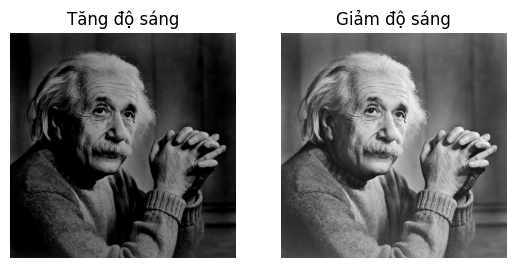

In [7]:
#Tăng độ sáng cho ảnh
def imcrease_img(img, c):
  img = img + c
  img[img > 255] = 255

  return img


img_ = imcrease_img(img, -50)
fx,ax = plt.subplots(1,2)
ax[0].imshow(img_)
ax[0].title.set_text('Tăng độ sáng')
ax[0].axis('off')


img_descrease = imcrease_img(img, 10)
ax[1].imshow(img_descrease)
ax[1].title.set_text('Giảm độ sáng')
ax[1].axis('off')

#


(-0.5, 479.5, 479.5, -0.5)

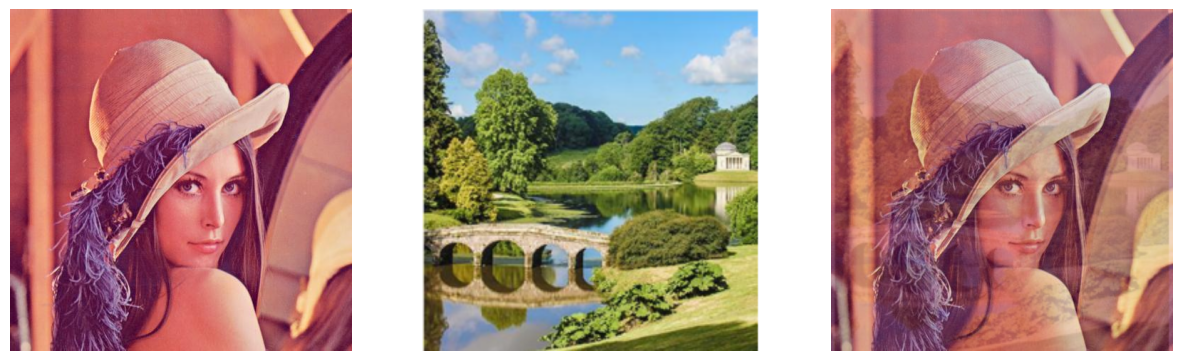

In [ ]:
img_lena = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/lena.png')


img_phongcanh = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/phongcanh.png')

img_phongcanh_resize = cv2.resize(img_phongcanh, (img_lena.shape[1], img_lena.shape[0]))



def blending_img(img_01,img_02):
  img = img_01.copy()
  h,w,c = img_01.shape
  for i in range(h):
    for j in range(w):
      for k in range(c):
        img[i][j][k] = img_01[i][j][k] * 0.8 + img_02[i][j][k] * 0.2
  return img

fx, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(img_lena[:,:,::-1])
# ax[0].title.set_text('Ảnh màu')
ax[0].axis('off')

ax[1].imshow(img_phongcanh_resize[:,:,::-1])
# ax[1].title.set_text('Ảnh xám')
ax[1].axis('off')


img = blending_img(img_lena, img_phongcanh_resize)

ax[2].imshow(img[:,:,::-1])
# ax[2].title.set_text('Kết quả')
ax[2].axis('off')



In [ ]:
img_lena.shape

(480, 480, 3)

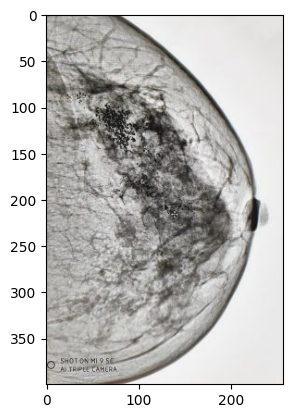

In [ ]:
img_ungthu= cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/ungthuvu.jpg')

img = 255 - img_ungthu
plt.imshow(img)

In [ ]:
img_ungthu= cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/ungthuvu.jpg',0)


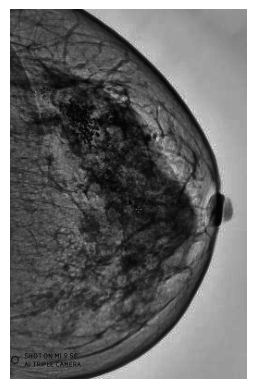

In [ ]:
def chuyen_doi_logarit(img,c):
  img = img.astype(float)
  return float(c) * cv2.log(1 + img)

transform = chuyen_doi_logarit(img_ungthu, -100)
plt.axis('off')
plt.imshow(transform,cmap='gray')

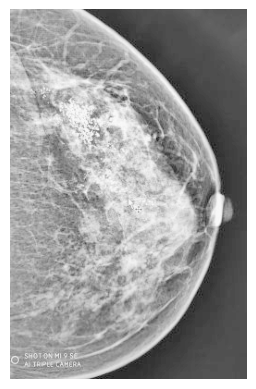

In [ ]:
# chuyển đổi gamma

def chuyen_doi_gamma(img,c,gamma):
  img = img.astype(float)
  return float(c) * np.power(img,gamma)

gamma = chuyen_doi_gamma(img_ungthu, 1, 0.2)
plt.axis('off')
plt.imshow(gamma,cmap='gray')


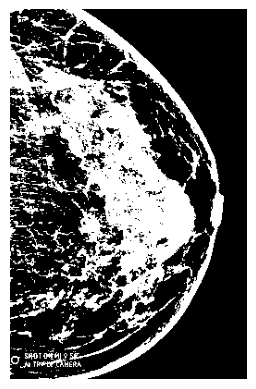

In [ ]:
def cat_nguong(img,t):
  return img > t

img_cat = cat_nguong(img_ungthu, 100)
plt.axis('off')
plt.imshow(img_cat,cmap='gray')
#

## Lab 3
### Task

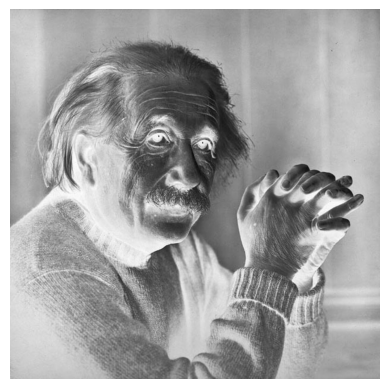

In [ ]:
# negative transform

img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/einstein_0.jpg')

def negative_transform(img):
  return 255 - img

img_output = negative_transform(img_input)

plt.imshow(img_output)
plt.axis('off')
plt.show()



(-0.5, 1279.5, 1279.5, -0.5)

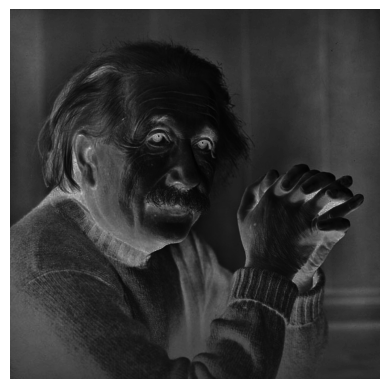

In [ ]:
# log transform

img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/einstein_0.jpg',0)
def log_transform(img,c):
  img = img.astype(float)
  return float(c) * cv2.log(1 + img)

img_log = log_transform(img_input, -2)
plt.imshow(img_log,cmap='gray')
plt.axis('off')

(-0.5, 1279.5, 1279.5, -0.5)

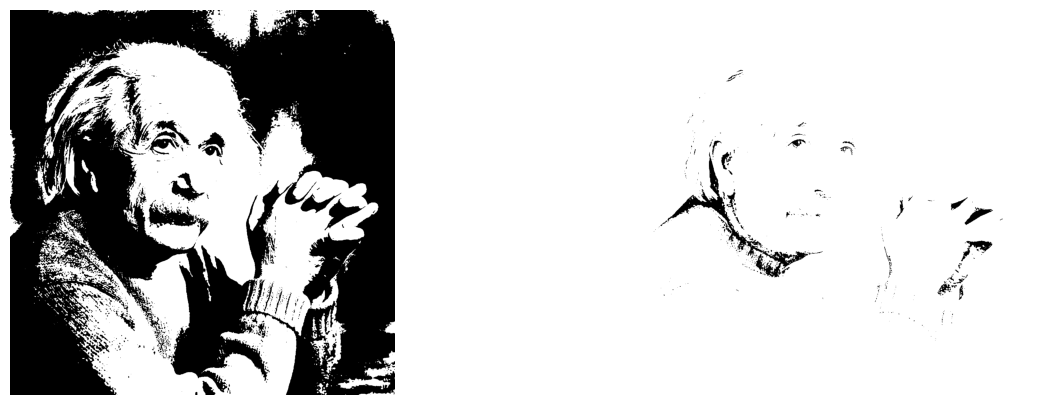

In [ ]:
# Less than mean

img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/einstein_0.jpg',0)
def less_than_mean(img):
  mean = np.mean(img)
  return img > mean


def less_than_mean_20(img):
  mean = np.mean(img)
  if mean > 20 and mean < 20:
    return img == 20
  else:
    return img > mean * 0.2


img_output = less_than_mean(img_input)
img_output_20 = less_than_mean_20(img_input)
fx, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(img_output,cmap='gray')
ax[0].axis('off')


ax[1].imshow(img_output_20,cmap='gray')
ax[1].axis('off')


(-0.5, 1279.5, 1279.5, -0.5)

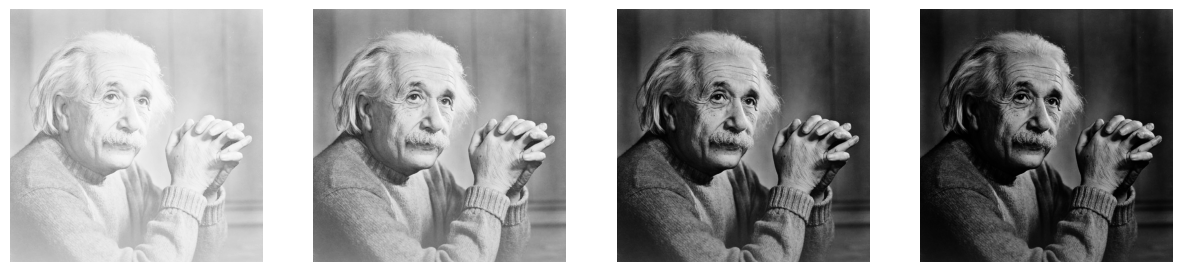

In [ ]:
# Apply Power Law transformation for the following values of γ (0.2, 0.5, 1.2 and 1.8) . Make
# sure to adjust data types accordingly
img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/einstein_0.jpg',0)

def power_law_transform(img,c,gamma):
  img = img.astype(float)
  return float(c) * np.power(img,gamma)

img_power_o = power_law_transform(img_input, 1, 0.2)
img_power_tw = power_law_transform(img_input, 1, 0.5)
img_power_t = power_law_transform(img_input, 1, 1.2)
img_power_f = power_law_transform(img_input, 1, 1.8)


fx, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].imshow(img_power_o,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img_power_tw,cmap='gray')
ax[1].axis('off')
ax[2].imshow(img_power_t,cmap='gray')
ax[2].axis('off')
ax[3].imshow(img_power_f,cmap='gray')
ax[3].axis('off')

(-0.5, 1279.5, 1279.5, -0.5)

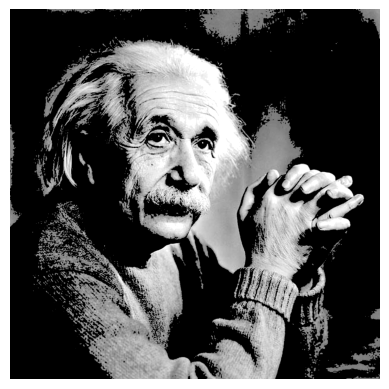

In [ ]:
# :Apply Gray level slicing using lower limit 100 and upper limit 200. Set all these values to 210

img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/einstein_0.jpg',0)

def gray_level_slicing(img,lower,upper):
  img[img < lower] = 0
  img[img > upper] = 210
  return img


img_output = gray_level_slicing(img_input, 100, 200)
plt.imshow(img_output,cmap='gray')
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

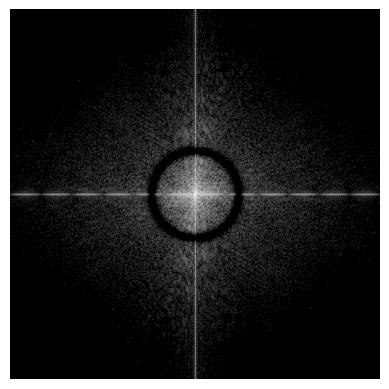

In [ ]:
img_input = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/butterworth-bandreject-filter-fourier.png',0)

def log_transform(img, c):
  img = img.astype(float)
  return float(c) * cv2.log(1 + img)

img_log = log_transform(img_input,20)

plt.imshow(img_log,cmap='gray')
plt.axis('off')

(-0.5, 646.5, 284.5, -0.5)

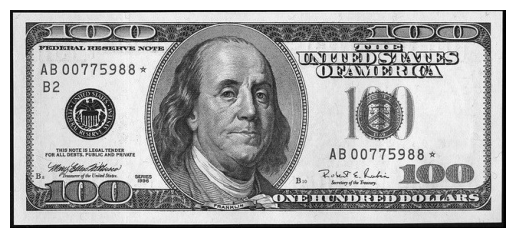

In [ ]:
# cắt mặt phẳng

img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_Lab01/usd.jpg',0)


def bit_plane_slicing(img,bit):
  arr = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      arr.append(np.binary_repr(img[i][j],width=8))
  return img


arr = np.array(int2bitarray(img))
arr= arr.reshape(img.shape[0],img.shape[1])
img_bit_0 = bit_plane_slicing(img,1)

plt.imshow(img_bit_0,cmap='gray')
plt.axis('off')